# **Obtención y preparación de datos**
# OD05. Conceptos de Algebra Lineal

## <font color='blue'>**Qué es el algebra lineal?**</font>

El **álgebra lineal** es una rama de las matemáticas que estudia conceptos tales como vectores, matrices, espacio dual, sistemas de ecuaciones lineales y, en su enfoque de manera más formal, espacios vectoriales y sus transformaciones lineales.

Es un área activa que tiene conexiones con muchas áreas dentro y fuera de las matemáticas, como el análisis funcional, las ecuaciones diferenciales, la investigación de operaciones, las gráficas por computadora, la ingeniería, etc.

**Es el lenguaje de muchas teorías matemáticas y físicas, machine learning y computación eficiente.**



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
sns.set()
rcParams['figure.dpi'] = 144

## <font color='blue'>**Escalares, vectores, matrices y tensores**</font>

Un **escalar** es únicamente un número, a diferencia de la mayoría de los otros elementos del álgebra lineal que son conjuntos de valores como los vectores y matrices.

$$\omega = 12.5$$
$$a = 3$$

Un **vector** es un arreglo de números. Un vector de $n$ componentes se define como un conjunto ordenado de $n$ números. Muchas nociones físicas, tales como las fuerzas, velocidades y aceleraciones, involucran una magnitud (el valor de la fuerza, velocidad o aceleración) y una dirección. Cualquier entidad que involucre magnitud y dirección se llama vector. Los vectores se representan por flechas en las que la longitud de ellas define la magnitud; y la dirección de la flecha representa la dirección del vector. Podemos pensar en los vectores como una serie de números. Éstos números tienen una orden preestablecido, y podemos identificar cada número individual por su índice en ese orden. Los vectores identifican puntos en el espacio, en donde cada elemento representa una coordenada del eje en el espacio. Podemos representarlos es las siguientes formas:

como vectores columna:

$$\vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0\\a_1\\a_2\\a_3\end{pmatrix}$$

o como vectores fila:

$$\vec{x} = \begin{pmatrix}t, y, z, w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0, a_1, a_2, a_3\end{pmatrix}$$

Una **matriz** es un arreglo bidimensional de números. Cada elemento de la misma está identificado por dos índices, en lugar de uno como en los vectores.

$$\mathbf{A} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{B} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

Existen diversos casos en los cuales se precisan mas de dos ejes para almacenar valores. En el caso general, una matriz con un número regular de ejes se lo conoce como tensor (matriz N-dimensional, con $N > 2$). Por ejemplo, cuando almacenamos los valores de los píxeles de una imagen a color necesitamos una matriz con tres ejes (uno para cada canal de color: R, G y B).

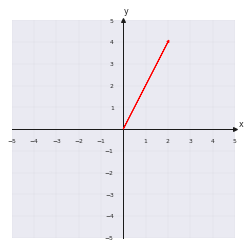

In [3]:
def e_cartesiano(n):
  """
  Crea un espacio cartesiano bidimensional de diemnsion n x n
  """
  fig, ax = plt.subplots(figsize=(4, 4))
  min = -1 * n
  max = n

  # Pocisionamos los ejes (axis) en el centro (0,0) y no en los bordes
  #como vienen por defecto
  for s in ['left', 'bottom']:
    ax.spines[s].set_position('zero')
    ax.spines[s].set_color('k')
    ax.spines[s].set_linewidth(1)
  for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
  # Añadimos una etiqueta a cada eje
  ax.set_xlabel('x', size=8, labelpad=-24, x=1.03)
  ax.set_ylabel('y', size=8, labelpad=-21, y=1.02, rotation=0)
  ax.set_alpha(0.5)
  # Creamos los ticks
  x_ticks = np.arange(min, max+1, 1) # Desde, hasta, frecuencia
  y_ticks = np.arange(min, max+1, 1)
  ax.set_xticks(x_ticks[x_ticks != 0])
  ax.set_yticks(y_ticks[y_ticks != 0])
  plt.xticks(fontsize=6)
  plt.yticks(fontsize=6)
  ax.set_xlim(min, max)
  ax.set_ylim(min, max)
  # Dibujamos la grilla
  ax.grid(which='both', color='grey', linewidth=0.2, 
          linestyle='-', alpha=0.2)
  # Y los ejes en color negro
  arrow_fmt = dict(markersize=4, color='k', clip_on=False, zorder=5)
  ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
  ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
  return ax


def draw_vect(v, color, origen=[0,0], zorder=6):
  """
  Dibuja un vector en el plano y le asigna un color específico
  """
  plt.arrow(*origen, v[0], v[1], 
            color=color, head_width=0.1, head_length=0.1,
            zorder=zorder)

e_cartesiano(5)  
draw_vect([2,4], 'red')



## <font color='green'>Actividad 1</font>

Utilizando la librería NumPy, crear las siguientes matrices e indicar el número de ejes, tamaño y forma para cada una.

$$\mathbf{A_1} = \begin{pmatrix}4 & 5 & 6\\8 & -1 & 7\end{pmatrix}\qquad
\mathbf{A_2} = \begin{pmatrix}3 & -5\\ -2 & 5\\8 & 8\end{pmatrix}\qquad
\mathbf{A_3} = \begin{pmatrix}4 & 7 & 5\end{pmatrix}$$
$$\mathbf{A_4} = \begin{pmatrix}4\\ 9 \\ 2\end{pmatrix}\qquad
\mathbf{A_5} = \begin{pmatrix}3&1\\7&8\end{pmatrix}\qquad
\mathbf{A_6} = \begin{pmatrix}5&0\\3&2\end{pmatrix}$$

In [4]:
#Solución ...
a1 = [[4,5,6],[8,-1,7]]
a2 = [[3,-5],[-2,5],[8,8]]
a3 = [4,7,5]
a4 = [[4,9,2]]
a5 = [[3,1],[7,8]]
a6 = [[5,0],[3,2]]

<font color='green'>Fin actividad 1</font>

## <font color='green'>Actividad 2</font>

Crear un tensor de nombre *A* de 15x15x3 de valores aleatorios enteros en el rango de 0 a 255 (niveles de intensidad de un pixel en el rango RGB) y graficarlo como si fuera una imagen.

In [ ]:
#Solución
rng = np.random.default_rng()
A = rng.integers(255, size=(15, 15, 3))
 
print(A)
np.ishow(A)

In [ ]:
from matplotlib.colors import rgb_to_hsv
def draw_punto(punto, pcolor):
  """
  Dibuja un punto en el plano y le asigna un color específico
  """
  
  r = pcolor[0]
  g = pcolor[1]
  b = pcolor[2]
  hex_color = '#{:02x}'.format(r)+'{:02x}'.format(g)+'{:02x}'.format(b)

  plt.plot(punto[0], punto[1], 'bo', color = hex_color, linewidth=1, markersize=1)
  #plt.arrow(*origen, v[0], v[1], color=color, head_width=0.1, head_length=0.1, zorder=zorder)



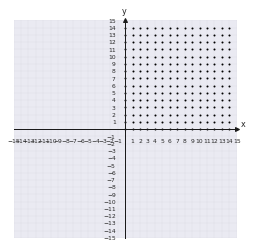

In [ ]:
e_cartesiano(15)  
for x in range(0,15):
    for y in range(0,15):
        cord_xy = np.array([x,y])
        #print(f"punto:({cordxy}) {A[x,y]}") 
        draw_punto(cord_xy, A[x,y])



<font color='green'>Fin actividad 2</font>

## <font color='blue'>**Operaciones con vectores y matrices**</font>

### <font color='blue'>**Multiplicación de matrices**</font>

Sean las siguientes matrices:

$$\mathbf{A} = \begin{pmatrix}a_{00} & a_{01} & a_{02} & a_{03}\\a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{22} & a_{23}\\ a_{30} & a_{31} & a_{32} & a_{33}\end{pmatrix} \qquad \vec{x} = 
\begin{pmatrix}x_0 \\ x_1 \\ x_2 \\ x_3\end{pmatrix}$$

La multiplicación de matrices se puede definir como:

$$\vec{p} = \mathbf{A} \vec{x}$$

donde

$$p_{i} = \sum_j a_{i j} x_j$$

Lo anterior nos permite pasar desde la representación matricial al sistema de ecuaciones, por ejemplo:

$$p_{0} = a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 $$

Multiplicando todo, obtenemos:

$$\quad \begin{pmatrix}a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 \\
a_{10} x_0 + a_{11} x_1 + a_{12} x_2 + a_{13} x_3\\a_{20} x_0 + a_{21} x_1 + a_{22} x_2 + a_{23} x_3\\a_{30} x_0 + a_{31} x_1 + a_{32} x_2 + a_{33} x_3 \end{pmatrix} = 
\begin{pmatrix}p_0\\p_1\\p_2\\p_3\end{pmatrix}$$

que corresponde a la representación como sistema de ecuaciones lineales.

La definición general para la multiplicación de matrices es:

$$\mathbf{C} = \mathbf{A}\mathbf{B}$$

entonces,

$$c_{i j} = \sum_k a_{i k} b_{k j}$$

<img src='https://drive.google.com/uc?export=view&id=1s5v3KJVjvq4BfNsiwou6mq6Za1jyr6Rf' width="500" align="center" style="margin-right: 20px">

Esta definición genera restricciones sobre lo que podemos multiplicar: solo funcionan aquellos casos en los que el **número de columnas en la primera matriz es igual al número de filas en la segunda matriz**. 

La multiplicación de matrices no es conmutativa, es decir, $\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$.

En Numpy, la multiplicacion de matrices se realiza con la función **dot**.

In [ ]:
A = np.array ([[1,2], [3,4], [5,6]]) 
B = np.array ([[1,2,3], [3,4,5]])

# A x B
np.dot(A, B)

array([[ 7, 10, 13],
       [15, 22, 29],
       [23, 34, 45]])

### <font color='blue'>**Adición de matrices**</font>
La adición de matrices es simplemente agregar los elementos correspondientes. Aunque se debe tener en cuenta que esto solo tiene sentido para matrices que tienen la misma forma. Por lo tanto, puede agregar dos (3 x 2), pero no un (3 x 2) y un (2 x 3).

La adición de matrices es conmutativa, por lo tanto, $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$

En Numpy, la suma de matrices se realiza con el operador **+**.



In [ ]:
A = np.array ([[1, 2, 3], [4, 5 ,6], [7, 8, 9]]) 
B = np.array ([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# A + B
A + B

array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])

Se tiene la siguiente suma de ecuaciones:

$$(a x + b y) + (c x + d y) = (a + c) x + (b + d) y$$

Lo anterior, lo podemos representar como un sistema de ecuaciones:

$$\begin{pmatrix}a_0 x + b_0 y\\a_1 x + b_1 y\\a_2 x + b_2 y\end{pmatrix} + 
\begin{pmatrix}c_0 x + d_0 y\\c_1 x + d_1 y\\c_2 x + d_2 y\end{pmatrix} = 
\begin{pmatrix}(a_0 + c_0) x + (b_0 + d_0) y\\(a_1 + c_1) x + (b_1 + d_1) y\\(a_2 + c_2) x + 
(b_2 + c_2) y\end{pmatrix}$$

En notación matricial, quedaría como una combinación de multiplicaciones y sumas de matrices:

$$\begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} + 
\begin{pmatrix}c_0 & d_0\\c_1 & d_1\\c_2 & d_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} = 
\begin{pmatrix}(a_0 + c_0) & (b_0 + d_0)\\(a_1 + c_1) & (b_1 + d_1)\\(a_2 + c_2) & (b_2 + c_2)\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix}$$

## <font color='blue'>**Ecuaciones lineales**</font>

Una ecuación lineal o de primer orden es una igualdad que involucra una o más variables a la primera potencia y no contiene productos entre las variables, es decir, una ecuación que involucra solamente sumas y restas de una variable a la primera potencia. Por ejemplo:

 1. $y = 1.75$
 1. $\pi w - e y = 3 x$
 1. $5(x + y + z) = 7y$

## <font color='blue'>**Sistemas de ecuaciones lineales**</font>

Un sistema de ecuaciones lineales es un conjunto de ecuaciones lineales de la forma:

$$a_{11} x_1 + a_{12} x_2 + a_{13} x_3 + ··· + a_{1n} x_n = b_1$$
$$a_{21} x_1 + a_{22} x_2 + a_{23} x_3 + ··· + a_{2n} x_n = b_2$$
$$.$$
$$.$$
$$.$$
$$a_{m1} x_1 + a_{m2} x_2 + a_{m3} x_3 + ··· + a_{mn} x_n = b_m$$

En este caso tenemos $m$ ecuaciones y $n$ incógnitas. Los números reales $a_{ij}$ se denominan coeficientes y los $x_i$ se denominan incógnitas (o números a determinar) y $b_j$ se denominan términos independientes.

Resolver el sistema consiste en calcular las incógnitas para que se cumplan todas las ecuaciones del sistema simultáneamente.

Veamos un ejemplo de 2 incoógnitas y dos ecuaciones:

$$5 x + 2.45 y = 3.6$$
$$6 x - 1.2 y = 0$$

O uno genérico de 4 variables y 4 ecuaciones:

$$a_0 t + b_0 y + c_0 z + d_0 w = e_0$$
$$a_1 t + b_1 y + c_1 z + d_1 w = e_1$$
$$a_2 t + b_2 y + c_2 z + d_2 w = e_2$$
$$a_3 t + b_3 y + c_3 z + d_3 w = e_3$$

En notación matricial:

$$\begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}
\begin{pmatrix}t\\y\\z\\w\end{pmatrix} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

Esto dice exactamente lo mismo, solo que en una forma diferente. Pero usa vectores y matrices, nuestros dos nuevos objetos y las ideas de multiplicación y suma de matrices. N este caso tenemos 2 vectores y 1 matriz, que puede ser escrito como:

$$\mathbf{A} = \begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}\qquad \vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix}
\qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

O de forma compacta

$$\mathbf{A}\mathbf{x} = \mathbf{e}$$

Despejando x, obtenemos

$$\mathbf{x} = \mathbf{A^{-1}}\mathbf{e}$$

Veamos esto con el ejemplo del sistema de ecuaciones de 2 x 2 anterior:


In [ ]:
# Creamos la matrix 'A' con los coeficientes
A = np.array([[5, 2.45], [6, 1.2]])
# Creamos el vector 'e' con los términos independientes 
e = np.array([[3.6], [0]])
print('Coeficientes\n', A)
print('Términos independientes \n', e)
# Aplicamos la fórmula; con np.linealg.inv() invertimos la matriz pasada como argumento
x = np.dot(np.linalg.inv(A), e)
print(f'El valor de la incógnita x es: {x[0][0]: 3.1f}')
print(f'El valor de la incógnita y es: {x[1][0]: 3.1f}')

Coeficientes
 [[5.   2.45]
 [6.   1.2 ]]
Términos independientes 
 [[3.6]
 [0. ]]
El valor de la incógnita x es: -0.5
El valor de la incógnita y es:  2.5


## <font color='green'>Actividad 3</font>

1. ¿Cuál de las matrices del ejercicio 1 se pueden multiplicar y en qué orden? ¿cuál es la forma de su producto?.
Seleccione 3 casos y realice la multiplicación.
1. Realice la suma de 3 matrices del ejercicio 1.

In [ ]:
#Solución
# 1.- Mutiplicaciones
r1 = np.dot(a1, a2)
r2 = np.dot(a4, a2)
r3 = np.dot(a2, a5)
print(f"a1 x a2 : {r1}\n")
print(f"a4 x a2 : {r2}\n")
print(f"a2 x a5 : {r3}\n")
 



a1 x a2 : [[50 53]
 [82 11]]

a2 x a4 : [[10 41]]

a2 x a5 : [[-26 -37]
 [ 29  38]
 [ 80  72]]



In [ ]:
# 2.- Sumas 
r1 = a1 + a2
r2 = a4 + a2
r3 = a2 + a5
print(f"a1 + a2 : {r1}\n")
print(f"a4 + a2 : {r2}\n")
print(f"a2 + a5 : {r3}\n")


a1 + a2 : [[4, 5, 6], [8, -1, 7], [3, -5], [-2, 5], [8, 8]]

a4 + a2 : [[4, 9, 2], [3, -5], [-2, 5], [8, 8]]

a2 + a5 : [[3, -5], [-2, 5], [8, 8], [3, 1], [7, 8]]



<font color='green'>Fin actividad 3</font>

## <font color='blue'>**Producto escalar y ortogonalidad**</font>

Un caso especial de multiplicación de matrices es multiplicar dos vectores. Por supuesto, no podemos multiplicar directamente dos vectores de 4 x 1; su forma es incompatible.

Para poder realizar esta multiplicación es necesario transponer el vector, lo que corresponde a intercambiar filas por columnas. Se denota con una 𝑇 mayúscula como exponente.

Trabajando con las matrices anteriores:

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

$$\mathbf{B}^T = \begin{pmatrix}a_0 & a_1\\b_0 & b_1\\c_0 & c_1\end{pmatrix}\qquad
 \mathbf{C}^T = \begin{pmatrix}a_0 & a_1 & a_2\\b_0 & b_1 & b_2\end{pmatrix}$$

Lo anterior, es equivalente a cambiar el orden de los índices de los elementos:

$$a_{ij} \rightarrow a_{ji}$$



In [ ]:
# Matriz A
print('Matriz A')
print(A, '\n')
print('Matriz A traspuesta')
# Matriz A traspuesta
print(A.T)

Matriz A
[[5.   2.45]
 [6.   1.2 ]] 

Matriz A traspuesta
[[5.   6.  ]
 [2.45 1.2 ]]


Tenga en cuenta que esto cambia la forma de la matriz. En particular, convertirá los vectores de columna en vectores de fila y viceversa.

In [ ]:
c = np.array([1, 2, 3, 4])
print(f'c es un vector de forma {c.shape}, luego tiene una sola dimensión (1-D)')
print(c, '\n')
# No podemos trasponer un objeto de 1-D
# Debemos darle una segunda dimensión aun cuando esta sea cero
c = np.array([[1, 2, 3, 4]]) # Atención a los dos pares de brackets
print(f'c es un vector de forma {c.shape}, ahora tiene dos dimensiones (2-D)')
print(c, '\n')
print(f'c traspuesto es un vector de forma {c.T.shape}')
print(c.T)


c es un vector de forma (4,), luego tiene una sola dimensión (1-D)
[1 2 3 4] 

c es un vector de forma (1, 4), ahora tiene dos dimensiones (2-D)
[[1 2 3 4]] 

c traspuesto es un vector de forma (4, 1)
[[1]
 [2]
 [3]
 [4]]


Es posible definir el **producto escalar** de dos vectores como:

$$\mathrm{dot}(\vec{a},\vec{b}) = \vec{a}\cdot\vec{b} = \vec{a}^T \vec{b}$$

El objeto resultante de esta operación es de $1x1$, es decir, un escalar. Por ejemplo:

$$\vec{x}\cdot\vec{e} = \begin{pmatrix}t & y & z & w\end{pmatrix}
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix} = e_0 t + e_1 y + e_2 z + e_3 w$$

Un caso aún más especial es el producto escalar de un vector consigo mismo. Esto da una medida escalar del vector y da lugar a la norma o magnitud (el largo) del vector.

$$\lVert \vec{v} \lVert^2 = \vec{v}\cdot\vec{v}$$

o

$$\lVert \vec{v} \lVert = \sqrt{\vec{v}\cdot\vec{v}}$$

Si estos vectores están en $\mathbb{R}^n$, entonces corresponde a la distancia euclidiana tradicional dada por el teorema de Pitágoras.



In [ ]:
print(f'Vector c de forma {c.shape}')
print(c, '\n')
d = np.array([[1], [2], [3], [4]])
print(f'Vector d de forma {d.shape}')
print(d, '\n')
print(f'Producto escalar de c y d = {np.dot(c, d)[0][0]}')

Vector c de forma (1, 4)
[[1 2 3 4]] 

Vector d de forma (4, 1)
[[1]
 [2]
 [3]
 [4]] 

Producto escalar de c y d = 30


In [ ]:
import math

e = np.array([[3], [4]]) 
print(f'Vector e de forma {e.shape}')
print(e, '\n')
print(f'Vector e traspuesto {e.T.shape}')
print(e.T, '\n')
print(f'Producto escalar de e traspuesto y e = {np.dot(e.T, e)}')

print(f'Y la norma de e = {math.sqrt(np.dot(e.T, e))}')

Vector e de forma (2, 1)
[[3]
 [4]] 

Vector e traspuesto (1, 2)
[[3 4]] 

Producto escalar de e traspuesto y e = [[25]]
Y la norma de e = 5.0


Producto escalar de e y f = [[2]]
Y la distancia Euclidiana entre ambos es = 5.4


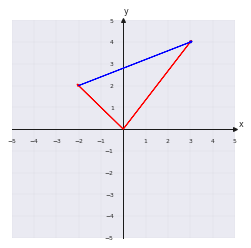

In [ ]:
f = np.array([[-2], [2]])
print(f'Producto escalar de e y f = {np.dot(e.T, f)}')
t = e - f
dist = math.sqrt(np.dot(t.T, t))
print(f'Y la distancia Euclidiana entre ambos es = {dist:3.1f}')
e_cartesiano(5)  
draw_vect(*e.T, 'red')
draw_vect(*f.T, 'red')
d = (f.T - e.T) *-1
draw_vect(*d, 'blue', *f.T, 7)

In [ ]:
print(np.linalg.norm(e - f))
print(math.sqrt(np.dot(t.T, t)))

5.385164807134504
5.385164807134504


Si consideramos las columnas vectoriales como direcciones en el espacio, podemos definir el concepto de **ortogonalidad**. Dos direcciones son ortogonales si son perpendiculares, es decir, dos líneas trazadas en las direcciones respectivas se cruzan en ángulo recto. En 2-D, podríamos elegir los ejes 𝑥 e 𝑦 (vectores rojos), o los dos vectores a 45 grados entre ellos (azules).

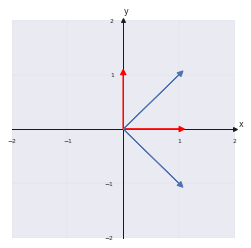

In [ ]:
e_cartesiano(2)  
draw_vect([0,1], 'red')
draw_vect([1,0], 'red')
draw_vect([1,1], 'b')
draw_vect([1,-1], 'b')

Por ejemplo consideremos los siguientes vectores:

$$\begin{pmatrix}1\\0\end{pmatrix}\cdot\begin{pmatrix}0\\1\end{pmatrix} = 0\qquad
\begin{pmatrix}1\\1\end{pmatrix}\cdot\begin{pmatrix}1\\-1\end{pmatrix} = 0$$

**Dos vectores son ortogonales si y solo si su producto escalar es cero**. 

$$\vec{a} \cdot \vec{b} = 0 \qquad \iff \qquad \vec{a}\; \mathrm{and}\; \vec{b}\ 
\mathrm{son\ ortogonales}$$

Esto nos permite definir el ángulo entre dos vectores

$$\vec{a} \cdot \vec{b} = \lVert \vec{a} \lVert\,\lVert \vec{b} \lVert\,\cos(\theta)$$
 
**¿Por qué es tan importante la ortogonalidad?** porque los vectores ortogonales llevan información independiente entre sí, al igual que nuestras direcciones 𝑥 e 𝑦. También son extremadamente importantes en la interpretación geométrica, ya que definen diferentes direcciones en un espacio.

In [ ]:
v1 = np.array([[1], [-2], [4]])
v2 = np.array([[2], [5], [2]])
print(f'Producto escalar de v1 y v2 = {np.dot(v1.T, v2)[0][0]}')
if np.dot(v1.T, v2)[0] == 0:
    print('Los vectores son ortogonales')
else:
    print('Los vectores no son ortogonales')

Producto escalar de v1 y v2 = 0
Los vectores son ortogonales


## <font color='green'>Actividad 4</font>
Determine qué pares de vectores son ortogonales.

In [ ]:
# Solución
v1 = np.array([[3], [2], [5], [7]])
v2 = np.array([[-2], [3], [-7], [5]])
print(f'Producto escalar de v1 y v2 = {np.dot(v1.T, v2)[0][0]}')
if np.dot(v1.T, v2)[0] == 0:
    print('Los vectores son ortogonales')
else:
    print('Los vectores no son ortogonales')

Producto escalar de v1 y v2 = 0
Los vectores son ortogonales


<font color='green'>Fin actividad 4</font>

## <font color='blue'>**Determinante**</font>
El determinante es un número especial que puede calcularse sobre las matrices cuadradas. Este número nos va a decir muchas cosas sobre la matriz. Por ejemplo, nos va decir si la matriz es invertible o no. Si el determinante es igual a cero, la matriz no es invertible. Cuando la matriz es invertible, el determinante de $A^{−1}=1/(det A)$. El determinante es útil para calcular áreas.

Para obtener el determinante de una matriz debemos calcular la suma de los productos de las diagonales de la matriz en una dirección menos la suma de los productos de las diagonales en la otra dirección. Se represente con el símbolo $|A|$ o $detA$.


Algunas de sus propiedades que debemos tener en cuenta son:

a. El determinante de la matriz identidad es igual a 1; $detI=1$.

b. Una matriz $A$ es singular (no tiene inversa) si su determinante es igual a cero.

c. El determinante cambia de signo cuando dos columnas (o filas) son intercambiadas.

d. Si dos filas de una matriz $A$ son iguales, entonces el determinante es cero.

e. Si alguna fila de la matriz $A$ son todos ceros, entonces el determinante es cero.

f. La matriz transpuesta $A_T$, tiene el mismo determinante que $A$.
.

g. El determinante de $AB$ es igual al determinante de $A$ multiplicado por el determinante de $B$.

 $det(AB)=detA⋅detB$

h. El determinante es una función lineal de cada una de las filas en forma separada. Si multiplicamos solo una fila por $\alpha$, entonces el determinante también es multiplicado por $\alpha$.

Veamos como podemos obtener el determinante con la ayuda de Python:

In [ ]:
A = np.array([[1, 2, 3],
              [2,-2, 4],
              [2, 2, 5]] )
I = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]] )
print(f'Determinante de A es: {np.linalg.det(A):3.1f}')
print(f'Determinante de la matriz identidad  I es: {np.linalg.det(I):3.1f}')

Determinante de A es: 2.0
Determinante de la matriz identidad  I es: 1.0


### Para qué sirven los determinantes
* Nos permiten estudiar la posición relativa de rectas y planos (sabemos que la posición relativa que ocupan rectas y planos se puede calcular a través de sistemas de ecuaciones lineales, que son resueltas por determinantes de matrices).
* Podemos obtener la ecuación implícita de un plano (a través de un determinante nulo).
* Son un instrumento para calcular áreas de figuras en el plano.
* Nos ayudan a calcular el rango de una matriz con parámetros.
* Son útiles para calcular el volumen de los paralelepípedos.

## <font color='blue'>**Vectores linealmente independientes**</font>

Un conjunto de vectores es linealmente independiente si no es posible escribir ninguno de ellos como una combinación lineal de los demás.

Los vectores ortogonales son automáticamente linealmente independientes, pero otros también pueden serlo. En general, se puede decir que los vectores $\{ \vec{v}_0, \ldots, \vec{v}_i, \ldots, \vec{v}_n \}$ son linealmente dependientes si podemos encontrar un conjunto de constantes $c_i$, que no es igual a 0, tal que:

$$\sum_i c_i \vec{v}_i = c_0 \vec{v}_0 + c_1 \vec{v}_1 + ... + c_n \vec{v}_n = 0$$

Ejemplo de vector dependiente es:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\1\\0\end{pmatrix}$$

ya que es posible sumar los dos primeros vectores para obtener un vector que es el doble del tercero:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\end{pmatrix} =
\begin{pmatrix}2\\2\\0\end{pmatrix}
= 2\begin{pmatrix}1\\1\\0\end{pmatrix}$$

Sin embargo, este conjunto de vectores, muy similar al anterior, si son linealmente independientes:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\-1\\0\end{pmatrix}$$

En un sistema con $n$ vectores linealmente independientes, se pueden definir exactamente $n$ direcciones ortogonales. Esta es la **dimensión del sistema**. Es una medida del contenido de la información.

La determinación de la independencia lineal es difícil de realizar mediante inspección. Incluso calcular el determinante se vuelve difícil a medida que aumentan las dimensiones de una matriz. Afortunadamente, podemos usar NumPy para calcular el determinante de una matriz de manera fácil usando la función **linalg.det()**.

In [ ]:
A = np.array([[0, 1, -3], [1, 0, 1], [4, 1, 1]])
print("Linealmente dependiente")
print(A)
print(np.linalg.det(A))
print()

B = np.array([[0, 1, 1], [1, 0, 1], [4, 1, 1]])
print("Linealmente independiente")
print(B)
print(np.linalg.det(B))

Linealmente dependiente
[[ 0  1 -3]
 [ 1  0  1]
 [ 4  1  1]]
0.0

Linealmente independiente
[[0 1 1]
 [1 0 1]
 [4 1 1]]
4.0


Si el determinante es no nulo, el conjunto de vectores es linealmente independiente.

## <font color='blue'>**Rango**</font>
Un concepto que está ligado a la independencia lineal es el de rango. Los números de columnas $m$ y filas $n$ pueden darnos el tamaño de una matriz, pero esto no necesariamente representa el verdadero tamaño del sistema lineal, ya que por ejemplo si existen dos filas iguales en una matriz $A$, la segunda fila desaparecía en el proceso de eliminación. El verdadero tamaño de $A$ va a estar dado por su rango. El rango de una matriz es el número máximo de columnas (filas respectivamente) que son linealmente independientes. Por ejemplo, si tenemos la siguiente matriz de 3 x 4:

In [ ]:
A = np.array([[1, 1, 2, 4], [1, 2, 2, 5], [1, 3, 2, 6]])
A

array([[1, 1, 2, 4],
       [1, 2, 2, 5],
       [1, 3, 2, 6]])

Podemos ver que la tercer columna (2,2,2) es un múltiplo de la primera y que la cuarta columna (4,5,6) es la suma de las primeras 3 columnas. Por tanto el rango de $A$ va a ser igual a 2; ya que la tercer y cuarta columna pueden ser eliminadas.

In [ ]:
# Veamos el rango de A
np.linalg.matrix_rank(A)

2

## <font color='blue'>**Transformación lineal**</font>

Una función lineal 1-D se puede representar como:

$$f(x) = a x$$

donde $a$ es una constante. Pero también es posible definir funcionales lineales en más dimensiones, por ejemplo:

$$\vec{f}(\vec{x}) = \begin{pmatrix}a_x x + a_y y + a_z z\\b_x x + b_y y + b_z z\end{pmatrix}$$

donde $a_i$ y $b_i$ son constantes. Pero también es posible representar las funciones lineales de forma matricial, en este caso:

$$\begin{pmatrix}a_x&a_y&a_z\\b_x&b_y&b_z\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}$$

Lo anterior, nos permite definir que es una transformación lineal en general mediante la siguiente propiedad:

$$\vec{f}(\alpha \vec{x} + \beta \vec{y}) = \alpha\,\vec{f}(\vec{x}) + 
\beta\,\vec{f}(\vec{y})$$

## <font color='blue'>**Autovalores - Vectores propios y valores propios**</font>
Cuando estamos resolviendo ecuaciones lineales del tipo $Ax=b$, estamos trabajando con problemas estáticos. ¿Pero qué pasa si quisiéramos trabajar con problemas dinámicos?. Es en este tipo de situaciones donde los _Valores propios_ (Eigenvalores) y _vectores propios_ (Eigenvectores) tienen su mayor importancia.

Supongamos que tenemos una matriz cuadrada $A$ de $n×n$. Una pregunta natural que nos podríamos hacer sobre $A$ es: ¿Existe algún vector $x$ distinto de cero para el cual $Ax$ es un escalar múltiplo de $x$?. Si llevamos esta pregunta al lenguaje matemático nos vamos a encontrar con la siguiente ecuación:

$Ax=λx$

Cuando esta ecuación es válida y $x$ no es cero, decimos que $λ$ es el valor propio de $A$ y $x$ es su correspondinte vector propio.

### Calculando autovalores
Podemos comenzar por observar que la ecuación $Ax=λx$ es equivalente a $(A−λI)x=0$. Dado que estamos interesados en soluciones a esta ecuación que sean distintas de cero, la matriz $A−λI$ debe ser singular, es decir, no invertible, y con determinante igual a cero, $det(A−λI)=0$.

De esta forma, podemos utilizar esta ecuación para encontrar los Eigenvalores de $A$. Particularmente, podríamos formar el polinomio característico de la matriz $A$, el cual va a tener grado $n$ y por lo tanto va a tener $n$ soluciones, es decir que vamos a encontrar $n$ Eigenvalores. Algo que debemos tener en cuenta es, que a pesar de que la matriz $A$ sea real, debemos estar preparados para encontrar Eigenvalores que sean complejos.

Para que quede más claro, veamos un ejemplo de como podemos calcular los Eigenvalores. Supongamos que tenemos la siguiente matriz:

$$A = \begin{pmatrix}3&2\\7& -2\end{pmatrix}$$
 
Su polinomio característico va a ser igual a:

$$p(λ)=det(A−λI)=det\begin{pmatrix}3−λ&2 \\7& -2−λ\end{pmatrix}=(3−λ)(−2−λ)−14=λ2−λ−20=(λ−5)(λ+4)$$
 
Por lo tanto los Eigenvalores de $A$ van a ser 5 y −4.

Obviamente, también los podemos obtener mucho más fácilmente con la ayuda de Python.

In [ ]:
# Eigenvalores con numpy
A = np.array([[3, 2],
              [7, -2]])

w, v = np.linalg.eig(A)

# x Eigenvalor, v Eigenvector
print(f'Eigenvalores de A: {w}')
print(f'Eigenvectores de A:\n {v}')

Eigenvalores de A: [ 5. -4.]
Eigenvectores de A:
 [[ 0.70710678 -0.27472113]
 [ 0.70710678  0.96152395]]


Observe las dos variables $w$ y $v$ asignadas a la salida de _numpy.linalg.eig()_. A la primera variable $w$ se le asigna una matriz de autovalores calculados y a la segunda variable $v$ se le asigna la matriz cuyas columnas son los autovectores normalizados correspondientes a los autovalores en ese orden.

Luego, el valor propio <br>
$w[0]$ va con $v[:,0]$<br>
$w[1]$ va con $v[:,1]$

Verifiquemos la condición
$$Av = \lambda v$$

In [ ]:
# La parte izquierda es 
Av = np.dot(A, v[:,0])
# La parte derecha es 
λv = np.dot(w[0],v[:,0])
# Verificamos
Av == λv

array([ True,  True])

In [ ]:
# y los vectores propios si están normalizados deben tener una norma = 1
print(np.linalg.norm(v[:,0]))
print(np.linalg.norm(v[:,1]))

0.9999999999999999
1.0


Conside la matriz:

$$\mathbf{A} = \begin{pmatrix}3&2\\1&4\end{pmatrix}$$

Queremos ver cuál es el efecto de esa matriz para los valores de $\mathbb{R}^2$. ¿Qué pasa cuando uno multiplica esa matriz A por un vector?

$$\mathbf{A} \begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}3&2\\1&4\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}3x+2y\\x+4y\end{pmatrix}$$

Tomamos un cuadrado con vértice en el origen y lado de tamaño unitario en el primer cuadrante:

<img src='https://drive.google.com/uc?export=view&id=1-O1C0-yk7tMUlBqr9bRGSocrZ1k9K1nJ' width="300" align="center" style="margin-right: 20px">

Llamamos $R$ a la zona formada por los vertices de los vectores unitarios. ¿En qué se transformará esta área bajo el efecto de nuestra matriz? Para responder esta pregunta podemos ver en que se transforman sus vértices.

$$\mathbf{A} \begin{pmatrix}0\\0\end{pmatrix} = \begin{pmatrix}0\\0\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}3\\1\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}2\\4\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}5\\5\end{pmatrix}$$

<img src='https://drive.google.com/uc?export=view&id=1cQCffFHcmBDtcZpvD7EuW2Dl54rC-wCp' width="300" align="center" style="margin-right: 20px">

¿Habrá vectores que después de la deformación conservaron la dirección?

* El vector (1,0) se transformó en el (3,1). No conserva la dirección.
* El (0,1) se transforma en el (2,4). No conserva la dirección.
* El (1,1) se transformó el (5,5). Entonces se produjo una dilatación de factor 5, y se conservó la dirección.

Ese vector que mantuvo su dirección se denomina **vector propio**, y el factor por el cual se dilató es el **autovalor** correspondiente.

En términos matemáticos:

Una matriz cuadrada posee vectores especiales que realmente no cambian. Estos se denominan **vectores propios** (*eigenvectors*), y los definimos simplemente como vectores distintos de cero donde:

$$\mathbf{M} \vec{v} = \lambda \vec{v}$$
 
donde 𝜆 es solo una constante, denominada **autovalor** para ese vector. Tenga en cuenta que varios vectores pueden tener el mismo valor propio, pero si lo tienen, también lo tendrá cualquier combinación lineal de ellos. Tenga en cuenta que estos autovalores y autovectores pueden ser números complejos, incluso para una matriz de valores reales. Por ejemplo:

$$\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\i\end{pmatrix} = 
\begin{pmatrix}1-i\\1+i\end{pmatrix} = (1-i)\begin{pmatrix}1\\i\end{pmatrix}\qquad
\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\-i\end{pmatrix} = 
\begin{pmatrix}1+i\\1-i\end{pmatrix} = (1+i)\begin{pmatrix}1\\-i\end{pmatrix}$$

Cada matriz tiene, como máximo, tantos de estos vectores como dimensiones, y conocer estos vectores más el 𝜆 puede permitir reconstruir la matriz original. Los autovectores forman un conjunto de vectores linealmente independientes.

<img src='https://drive.google.com/uc?export=view&id=1V9CF4lQSHCp3gDlt22PII1vaQv9SNpN-' width="400" align="center" style="margin-right: 20px">
